<a href="https://colab.research.google.com/github/utsav-195/sms-spam-ham-classification/blob/main/sms_spam_ham_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from spellchecker import SpellChecker

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Data Collection

In [ ]:
data_path = "/content/drive/Shareddrives/CS418/final project/data/SMSSpamCollection"
data = pd.read_csv(data_path,delimiter="\t",header=None)
data.columns = ["class","message"]

In [ ]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

## Data Preparation/Text Analysis

In [ ]:
def spell_corrected(msg):
  spell = SpellChecker()

  # find those words that may be misspelled
  misspelled = spell.unknown(msg)
  corrected_words = {}
  for word in misspelled:
      # Get the one `most likely` answer
      correct_spell = spell.correction(word)
      if correct_spell != word:
          corrected_words[word] = correct_spell

  for m in range(len(msg)):
    try:
      msg[m] = corrected_words[msg[m]]
    except:
      pass
  return msg

In [ ]:
corpus_stemmed = []
corupus_not_stemmed = []

ps = PorterStemmer()

for i in range(len(data['message'])):
# for i in range(0,len (test)):
    # Applying Regular Expression
    
    '''
    Replace email addresses with 'emailaddr'
    Replace URLs with 'httpaddr'
    Replace money symbols with 'moneysymb'
    Replace phone numbers with 'phonenumbr'
    Replace numbers with 'numbr'
    '''
    if i %100 == 0:
      print(i)
    # msg = test[i]
    msg = data['message'][i]
    # Each word to lower case
    msg = msg.lower()
    # print(msg)
    msg = re.sub('[\w\-.]+?@\w+?\.\w{2,4}', ' emailaddr ', msg)
    msg = re.sub('(http[s]?\S+)|(\w+\.[a-z]{2,4}\S*)', 'httpaddr', msg)
    msg = re.sub('£|\$', ' moneysymb ', msg)
    msg = re.sub(' [0-9]{4}(-)?[0-9]{3}(-)?[0-9]{4} ', ' phonenumber ', msg)
    msg = re.sub('\d+(\.\d+)?', ' number ', msg)
    msg = re.sub(' u ', ' you ', msg)

    ''' Remove all punctuations '''
    msg = re.sub('[^\w\d\s]', ' ', msg)
    # Splitting words to Tokenize
    msg = msg.split()
    # print(msg)
    msg = spell_corrected(msg)
    corupus_not_stemmed.append(' '.join(msg))
    # print(msg)
    # Stemming with PorterStemmer handling Stop Words
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    
    # # preparing Messages with Remaining Tokens
    msg = ' '.join(msg)
    # print(msg)
    # Preparing WordVector Corpus
    corpus_stemmed.append(msg)

In [ ]:
data['not_stemmed'] = corupus_not_stemmed

In [ ]:
data['stemmed'] = corpus_stemmed

In [ ]:
data.to_csv("/content/drive/Shareddrives/CS418/final project/data/data_cleaned.csv",sep=";")

In [ ]:
data_path = "/content/drive/Shareddrives/CS418/final project/data/data_cleaned.csv"
data = pd.read_csv(data_path,delimiter=";",index_col=None)
data = data.iloc[:, 1:]

In [ ]:
data.head()

,class,message,not_stemmed,stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",go until juron point crazy available only in b...,go juron point crazi avail bugi n great world ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking if you on,ok lar joke
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wily comp to win fa cup...,free entri number wili comp win fa cup final t...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor you c already then say,u dun say earli hor c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to us he lives aroun...,nah think goe us live around though


In [ ]:
data['stemmed'] = data['stemmed'].fillna("")
data['not_stemmed'] = data['not_stemmed'].fillna("")

## Data Exploration

In [ ]:
token_length_stemmed = []
for d in data['stemmed']:
  token_length_stemmed.append(len(d.split()))

In [ ]:
token_length_not_stemmed = []
for d in data['not_stemmed']:
  token_length_not_stemmed.append(len(d.split()))

In [ ]:
character_length_stemmed = []
for d in data['stemmed']:
  character_length_stemmed.append(len(d))

In [ ]:
character_length_not_stemmed = []
for d in data['not_stemmed']:
  character_length_not_stemmed.append(len(d))

In [ ]:
data['tokens_stemmed'] = token_length_stemmed
data['characters_stemmed'] = character_length_stemmed
data['tokens_not_stemmed'] = token_length_not_stemmed
data['characters_not_stemmed'] = character_length_not_stemmed

In [ ]:
y_graph = data.groupby('class').mean()

In [ ]:
data.groupby('class').mean()

,tokens_stemmed,characters_stemmed,tokens_not_stemmed,characters_not_stemmed
class,,,,
ham,7.975959,41.511295,14.791088,69.278135
spam,19.471218,115.049531,27.149933,149.918340


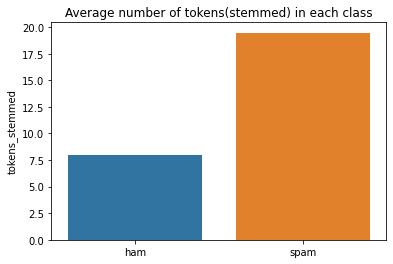

In [ ]:
plt.title("Average number of tokens(stemmed) in each class")
sns.barplot(x=['ham','spam'],y='tokens_stemmed', data=y_graph)

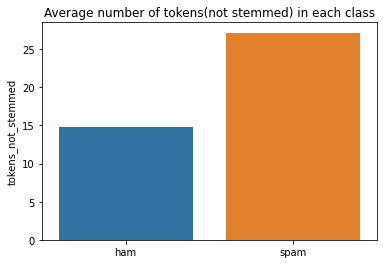

In [ ]:
plt.title("Average number of tokens(not stemmed) in each class")
sns.barplot(x=['ham','spam'],y='tokens_not_stemmed', data=y_graph)

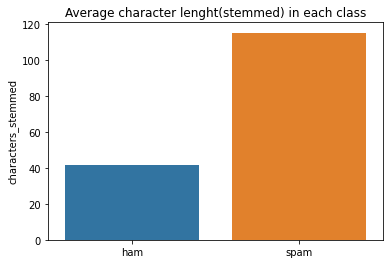

In [ ]:
plt.title("Average character lenght(stemmed) in each class")
sns.barplot(x=['ham','spam'],y='characters_stemmed', data=y_graph)

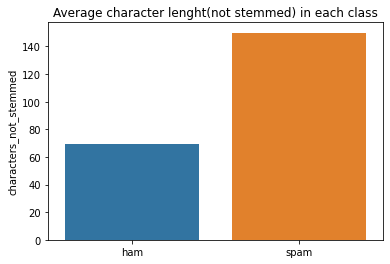

In [ ]:
plt.title("Average character lenght(not stemmed) in each class")
sns.barplot(x=['ham','spam'],y='characters_not_stemmed', data=y_graph)

In [ ]:
data_spam = data[data['class']=='spam']

In [ ]:
words = " ".join(data_spam.stemmed).split()

words_score ={word:0 for word in words}
# with white background --- for top 1000 words (tf-idf)in the dictionary
for each_word in list(set(words)):
    try:
      words_score[each_word] += words.count(each_word)
    except:
      pass

==== top 100 by occurences for spam ====


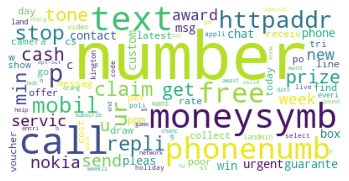

In [ ]:
print ("==== top 100 by occurences for spam ====")
wc = WordCloud(
    background_color="white",
    max_words=100
)

ww = wc.fit_words(words_score)
plt.imshow(ww)
plt.axis("off")
plt.show()

In [ ]:
data_ham = data[data['class']=='ham']

In [ ]:
words = " ".join(data_ham.stemmed).split()

words_score ={word:0 for word in words}
# with white background --- for top 1000 words (tf-idf)in the dictionary
for each_word in list(set(words)):
    try:
      words_score[each_word] += words.count(each_word)
    except:
      pass

==== top 100 by occurences for ham =====


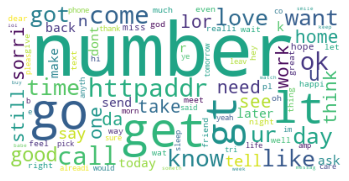

In [ ]:
print ("==== top 100 by occurences for ham =====")
wc = WordCloud(
    background_color="white",
    max_words=100
)

ww = wc.fit_words(words_score)
plt.imshow(ww)
plt.axis("off")
plt.show()

## Classification - CountVectorizer


In [ ]:
y = data.replace(['ham','spam'],[0, 1])['class']

In [ ]:
y.value_counts()

0    4825
1     747
Name: class, dtype: int64

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(data['stemmed']).toarray()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.30, random_state = 0)

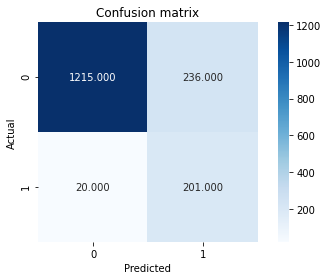

In [ ]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.84688995215311, 0.15311004784688997, array([0.98380567, 0.45995423]), array([0.83735355, 0.90950226]), array([0.90469099, 0.61094225])]


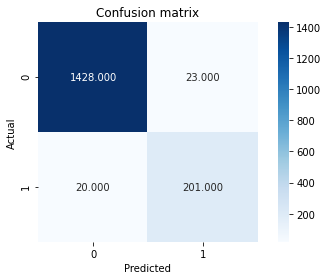

In [ ]:
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.9742822966507177, 0.02571770334928225, array([0.98618785, 0.89732143]), array([0.98414886, 0.90950226]), array([0.9851673 , 0.90337079])]


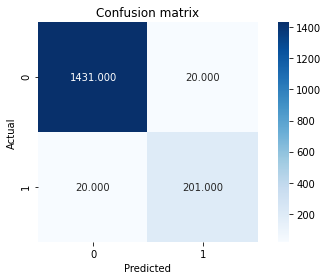

In [ ]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.9760765550239234, 0.02392344497607657, array([0.9862164 , 0.90950226]), array([0.9862164 , 0.90950226]), array([0.9862164 , 0.90950226])]


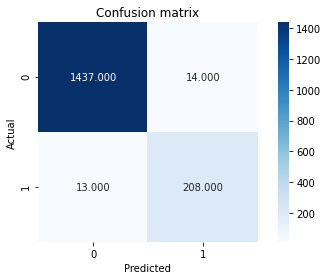

In [ ]:
classifier = SVC(kernel = 'linear') 
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.9838516746411483, 0.01614832535885169, array([0.99103448, 0.93693694]), array([0.99035148, 0.94117647]), array([0.99069286, 0.93905192])]


## Classification TFIDF

In [ ]:
vec = TfidfVectorizer()
x = vec.fit_transform(data['stemmed']).toarray()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.30, random_state = 0)

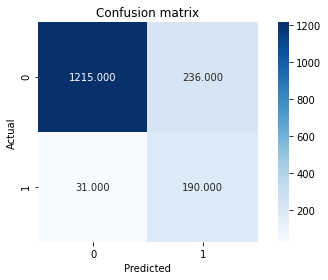

In [ ]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.840311004784689, 0.159688995215311, array([0.97512039, 0.44600939]), array([0.83735355, 0.85972851]), array([0.90100111, 0.58732612])]


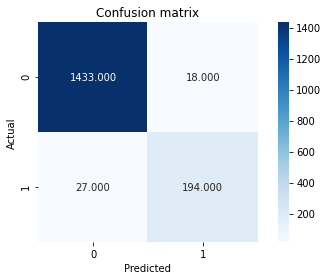

In [ ]:
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.9730861244019139, 0.026913875598086112, array([0.98150685, 0.91509434]), array([0.98759476, 0.87782805]), array([0.98454139, 0.8960739 ])]


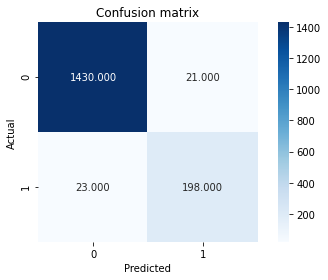

In [ ]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.9736842105263158, 0.02631578947368418, array([0.98417068, 0.90410959]), array([0.98552722, 0.8959276 ]), array([0.98484848, 0.9       ])]


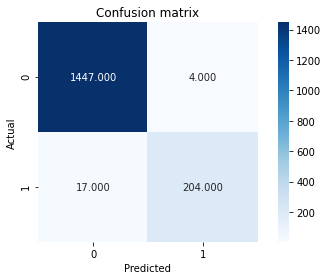

In [ ]:
classifier = SVC(kernel = 'linear') 
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average=None)
recall = metrics.recall_score(ytest, y_pred, average=None)
F1_score = metrics.f1_score(ytest, y_pred, average=None)
print([accuracy, error, precision, recall, F1_score])

[0.9874401913875598, 0.012559808612440215, array([0.98838798, 0.98076923]), array([0.99724328, 0.92307692]), array([0.99279588, 0.95104895])]
